# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
import csv
import random
from camel_tools.tokenizers.word import simple_word_tokenize
from collections import Counter
from utils.textnormalization import TextNormalization
from utils.machinelearning import machine_learning_model, fit_model, metrics_values, confusion_matrix_
from utils.deeplearning import convolutional_neural_network_1d, model_compile, model_fit, evaluate, plot_accuracy_loss, lstm_, gru_
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import go_figure , bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_2_vec import word_2_vec_
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
import arabic_reshaper
from bidi.algorithm import get_display
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Corpus = pd.read_csv('original_dataset.csv')
Corpus.rename(columns={'rating': 'Sentiment', 'review_description': 'Review'}, inplace=True)
Corpus['Review'] = Corpus['Review'].astype(str)
Corpus.drop(columns=['Unnamed: 0', 'Unnamed: 4', 'company'], axis=1, inplace=True)
Corpus.tail(10)

,Review,Sentiment
67117,فندق مناسب للعائلات . سعة الشقة الموقع جيد. كث...,Neutral
67118,عندما اقرأ موضوع العذراء ينمو بداخلي الف سؤال ...,Neutral
67119,حسن. . التاخير في ارسال الطلبات,Neutral
67120,إسلوب الكتاب الأكاديمى كان بيصيبنى بالملل فى أ...,Neutral
67121,مقبول . اعجبني قربه من امارات مول ايضا المنطقه...,Neutral
67122,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...,Neutral
67123,أول تجربة مع الخيال العلمي...الكثير من المعلوم...,Neutral
67124,مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...,Neutral
67125,الرسائل بين وائل و شوق كانت أجمل مافي الرواية....,Neutral
67126,استقبال سيء جدا وعدم الاستعداد للنزلاء . لا شي...,Neutral


In [5]:
Data = pd.read_csv('ArabicData.csv') # This Data Will Be Use For Word2Vec
Data

,Unnamed: 0,Text
0,0,حمام الكبريت \r\nنصحوني بتجربة حمام الكبريت. ي...
1,1,قلعة ساحرة \r\nمنظر خلاب للمدينة من أعلى القلع...
2,2,تبليسي \r\nتبليسي جورجيا\r\nمن أجمل المدن التي...
3,3,جولة على المدينة القديمة تبليسي < شاردن \r\nمم...
4,4,احلي اجازه لمحبي الطبيعه \r\nالمناظر الخلابه ا...
...,...,...
2152333,2152333,جيد. رائع. الخدمه
2152334,2152334,“دون المستوى”. قربه من الحرم. كل شيء
2152335,2152335,مخيب للأمل. . سوء التنسيق من حيث معرفة الغرف ب...
2152336,2152336,“رأي الشخصي”. المطعم جيد ومتنوع -المسافة للحرم...


# Sentiment Information

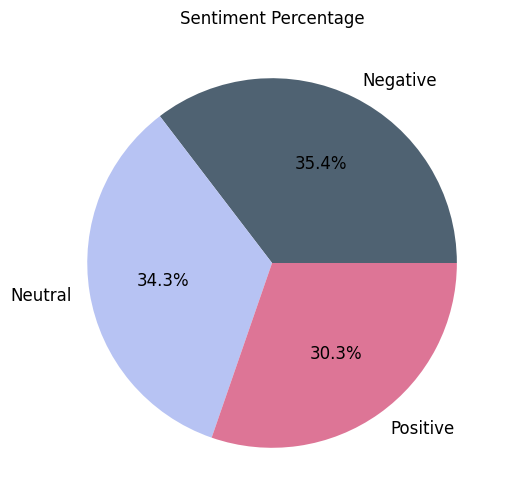

In [6]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

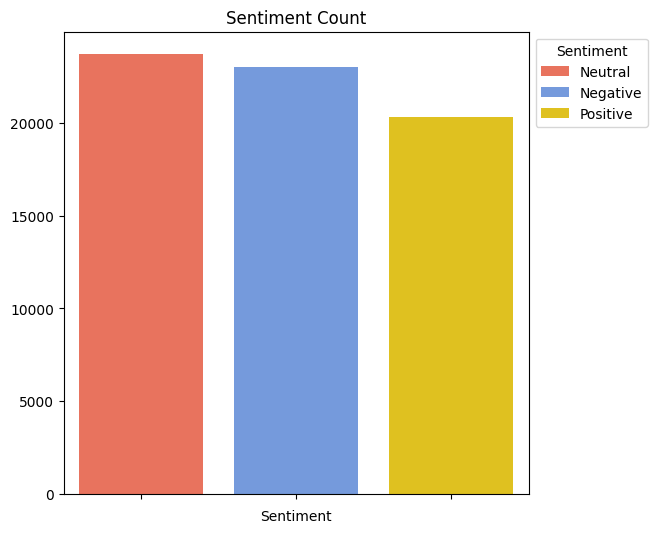

In [7]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)


In [9]:
Corpus['NumberOfSentences'].sum()

121704

# Average Number Of Sentences

In [10]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

2

# Maximum Number Of Sentences

In [11]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

176

# Minimum Number Of Sentences

In [12]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Text Normalization

In [13]:
text_normalization = TextNormalization(_remove_emojis = True,
                                        _remove_hashtags = True,
                                        _remove_emails = True ,
                                        _remove_url = True,
                                        _remove_mention = True,
                                        _remove_duplicate_char = True,
                                        _remove_single_char = True,
                                        _remove_special_character_ = True,
                                        _remove_new_line_char = True,
                                        _remove_number = True,
                                        _remove_html_tags = True,
                                        _remove_arabic_diacritics_ = True,
                                        _normalize_arabic_unicode_ = True,
                                        _normalize_alef_maksura_ar_ = True,
                                        _normalize_alef_ar_ = True,
                                        _normalize_teh_marbuta_ar_ = True,
                                        _remove_non_arabic = True,
                                        _remove_whitespace_ = True,
                                        _remove_unicode_characters_ = True,
                                        _remove_longest_than_ = True,
                                        _remove_stop_words = True,
                                        _lemmatizer_ = False,
                                        _stemmer_ = False)

In [14]:
Corpus['Normalized_Review'] = Corpus['Review'].apply(lambda x: text_normalization.normalization(x))

In [15]:
Corpus.dropna(axis=1, inplace=True)

# Number Of Unique Words

In [16]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

136658

# WordCloud

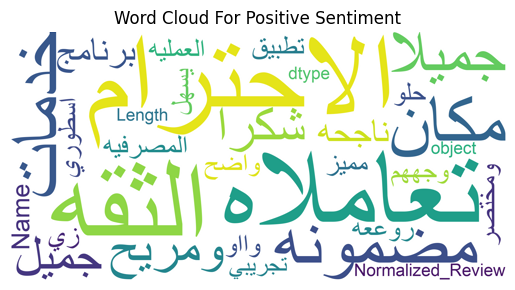

In [17]:
wordcloud(data=Corpus, target='Positive', width=2000, hieght=1000, text='Normalized_Review')

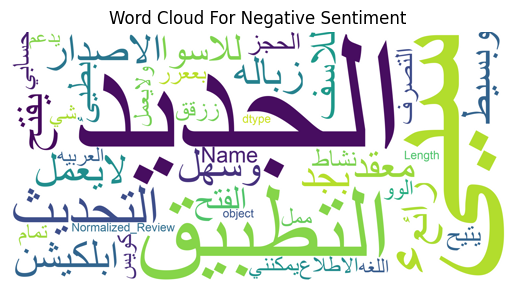

In [18]:
wordcloud(data=Corpus, target='Negative', width=2000, hieght=1000, text='Normalized_Review')

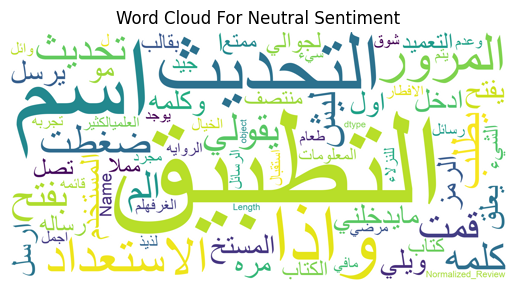

In [19]:
wordcloud(data=Corpus, target='Neutral', width=2000, hieght=1000, text='Normalized_Review')

# Most Frequent Words 

In [20]:
MostFrequentWord = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF = pd.DataFrame(MostFrequentWord, columns=('Word', 'Count'))
MostFrequentWordDF

,Word,Count
0,التطبيق,5878
1,الروايه,5684
2,الكتاب,5492
3,تطبيق,4652
4,مش,3793
5,ممتاز,3480
6,الفندق,3357
7,الله,3330
8,اللي,3272
9,البرنامج,3102


In [21]:
go_figure(data=MostFrequentWordDF)

In [22]:
bar_plot(data=MostFrequentWordDF)

# Number Of Words 

In [23]:
Corpus["Number of Words"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[ Corpus["Number of Words"] == 0].index, inplace = True)
Corpus["Number of Words"].sum()

1039837

# Number Of Charachters 

In [24]:
Corpus["Number of Charachters"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters"].sum()

6403748

# Average Number Of Words 

In [25]:
AverageNaumberOfWords = int(np.round((Corpus["Number of Words"].mean())))
AverageNaumberOfWords

16

# Average Number Of Charachters 

In [26]:
AverageNumberOfCharachters = int(np.round(Corpus["Number of Charachters"].mean()))
AverageNumberOfCharachters

98

# Maximum Number Of Word

In [27]:
MaximumNaumberOfWords = Corpus["Number of Words"].max()
MaximumNaumberOfWords

922

# Maximum Number Of Charachters 

In [28]:
MaximumNumberOfCharachters = Corpus['Number of Charachters'].max() 
MaximumNumberOfCharachters

6112

# Minimum Number Of Words

In [29]:
MimimumNaumberOfWords = Corpus["Number of Words"].min()
MimimumNaumberOfWords

1

# Minimum Number Of Charachters 

In [30]:
MinimumNumberOfCharachters = Corpus['Number of Charachters'].min() 
MinimumNumberOfCharachters

1

# Split The Dataset Into X And y

In [31]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']
le = LabelEncoder()
y = le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# CountVectorizer

In [33]:
CountVectorizer_ = CountVectorizer()
X_train_CV_ = CountVectorizer_.fit_transform(X_train)
X_test_CV_ = CountVectorizer_.transform(X_test)

In [34]:
Vocabulary = CountVectorizer_.vocabulary_
Vocabulary

{'الكتاب': 18159,
 'كويس': 64404,
 'مش': 77945,
 'وحش': 95443,
 'نظري': 83374,
 'بيوصل': 35910,
 'معلومات': 79108,
 'حلوه': 45781,
 'حسيت': 45306,
 'التشويق': 10462,
 'كانش': 62855,
 'موجود': 81400,
 'وكاني': 99409,
 'باخد': 26088,
 'حصه': 45382,
 'رياضيات': 49667,
 'المدرسه': 20019,
 'وفي': 98987,
 'الرياضيات': 13754,
 'بتبقي': 29532,
 'ممله': 80484,
 'الواقع': 23291,
 'العلم': 16456,
 'بيعتمد': 35594,
 'المنطق': 21976,
 'والفهم': 90374,
 'بيحفظهولنا': 35260,
 'حفظ': 45508,
 'المدارس': 19990,
 'بحب': 30708,
 'دا': 47227,
 'خلاني': 46908,
 'اجيب': 1635,
 'برضه': 31520,
 'والمتعه': 90783,
 'نفسي': 83607,
 'استاذ': 3637,
 'احمد': 2083,
 'خالد': 46287,
 'توفيق': 42515,
 'يبيين': 105139,
 'روعه': 49596,
 'وقوه': 99337,
 'تشويقها': 39334,
 'مالك': 73929,
 'قربه': 61668,
 'الحرم': 12031,
 'ووجود': 103036,
 'الخدمات': 12532,
 'وجود': 95154,
 'شبكه': 52864,
 'مصرفيه': 78326,
 'وقوع': 99319,
 'الفندق': 17394,
 'اعلي': 5843,
 'الجبل': 11403,
 'يصعب': 107964,
 'الوصول': 23458,
 'مشي': 78204,
 'ال

# Machine Learning

**1-Naive Bayes**

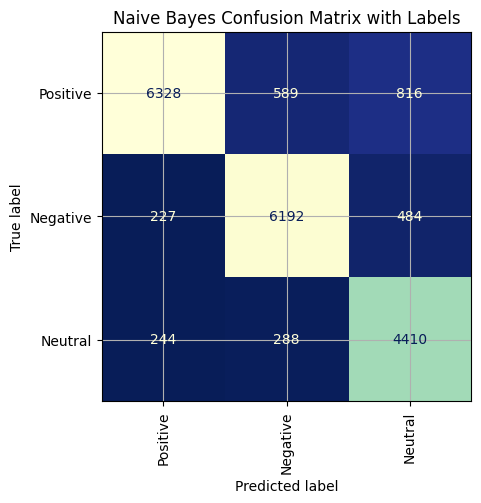

In [35]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Naive_Bayes, X_test=X_test_CV_, y_test=y_test, name='Naive Bayes')

In [36]:
metrics_values(model= Naive_Bayes, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.864746
Precision,0.869221
Recall,0.859664
F1Score,0.861754
Error,0.135254


**2-Logistic Regression**

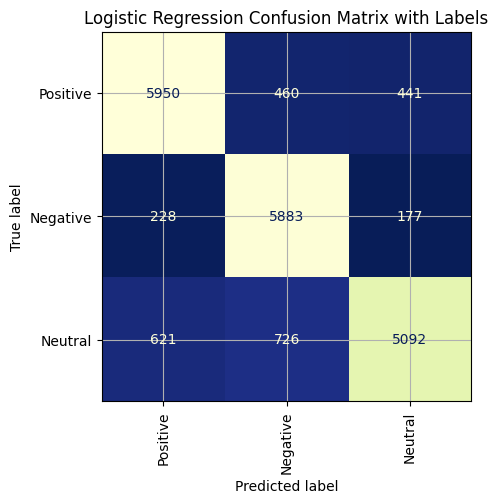

In [37]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(Logistic_Regression, X_test=X_test_CV_, y_test=y_test, name='Logistic Regression')

In [38]:
metrics_values(model= Logistic_Regression, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.864491
Precision,0.864961
Recall,0.866374
F1Score,0.863647
Error,0.135509


**3-Decision Tree**

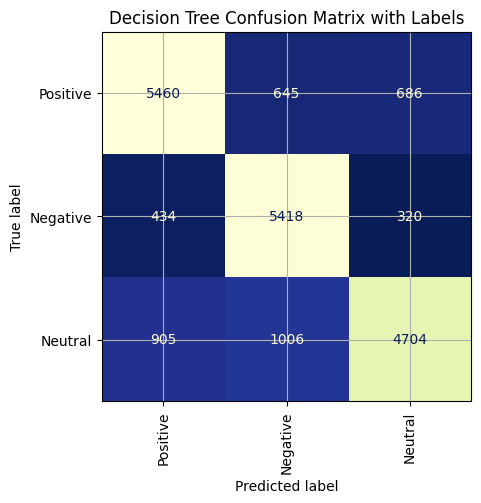

In [39]:
Algorithm = DecisionTreeClassifier(criterion='gini')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Decision_Tree, X_test=X_test_CV_, y_test=y_test, name='Decision Tree')

In [40]:
metrics_values(model= Decision_Tree, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.795893
Precision,0.797651
Recall,0.797774
F1Score,0.795075
Error,0.204107


**4-K Nearest Neighbors**

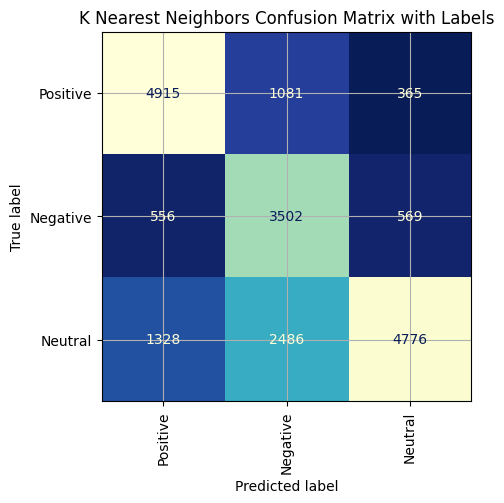

In [41]:
Algorithm =KNeighborsClassifier(metric='euclidean', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test, name='K Nearest Neighbors')

In [42]:
metrics_values(model= K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.673869
Precision,0.695178
Recall,0.684910
F1Score,0.671257
Error,0.326131


**5-Random Forest**

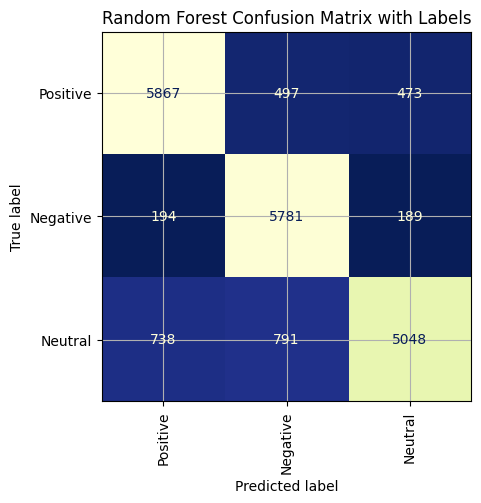

In [43]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=300)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Random_Forest, X_test=X_test_CV_, y_test=y_test, name='Random Forest')

In [44]:
metrics_values(model= Random_Forest, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.852794
Precision,0.854504
Recall,0.854927
F1Score,0.851974
Error,0.147206


**6-SGD Classifier**

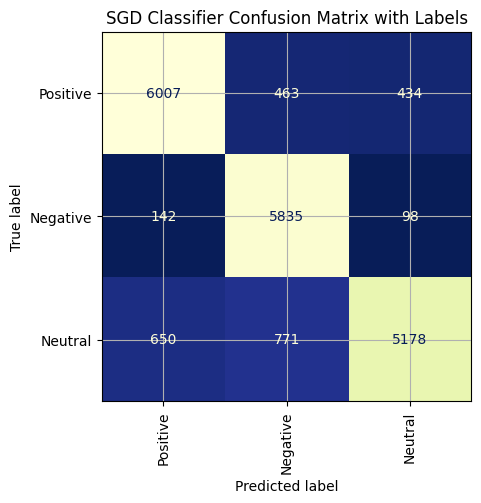

In [45]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=SGD, X_test=X_test_CV_, y_test=y_test, name='SGD Classifier')

In [46]:
metrics_values(model= SGD, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.869343
Precision,0.871744
Recall,0.871926
F1Score,0.868645
Error,0.130657


# Build Word2Vec

In [47]:
word_2_vec_(data = Data['Text'], vector_size=100, sg = 1, name = 'ArabicWord2Vec100D')

# Deep Learning

In [48]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test, y_train, y_test = deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre', y_train_=y_train, y_test_=y_test)
embedding_dim = 100

In [49]:
Arabic_Word_2_Vec_100D = './ArabicWord2Vec100D.txt'
embedding_dic = {}
with open(Arabic_Word_2_Vec_100D) as f:
    for line in f:
        values = line.split()
        word = values[0]
        x = np.asarray(values[1:], dtype='float32')
        embedding_dic[word] = x

In [50]:
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dic.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [51]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=3
                )

**7-Convolutional Neural Network**

Epoch 1/15
1428/1428 [==============================] - 165s 114ms/step - loss: 0.6764 - accuracy: 0.6577 - val_loss: 0.3638 - val_accuracy: 0.8267
Epoch 2/15
1428/1428 [==============================] - 93s 65ms/step - loss: 0.3997 - accuracy: 0.8058 - val_loss: 0.3186 - val_accuracy: 0.8462
Epoch 3/15
1428/1428 [==============================] - 86s 60ms/step - loss: 0.3598 - accuracy: 0.8227 - val_loss: 0.3162 - val_accuracy: 0.8443
Epoch 4/15
1428/1428 [==============================] - 82s 57ms/step - loss: 0.3334 - accuracy: 0.8357 - val_loss: 0.3146 - val_accuracy: 0.8444
Epoch 5/15
1428/1428 [==============================] - 98s 68ms/step - loss: 0.3084 - accuracy: 0.8482 - val_loss: 0.3241 - val_accuracy: 0.8400
Epoch 6/15
1428/1428 [==============================] - 84s 59ms/step - loss: 0.3011 - accuracy: 0.8508 - val_loss: 0.5428 - val_accuracy: 0.7273
Epoch 7/15
1428/1428 [==============================] - 98s 68ms/step - loss: 0.3095 - accuracy: 0.8464 - val_loss: 0.3292

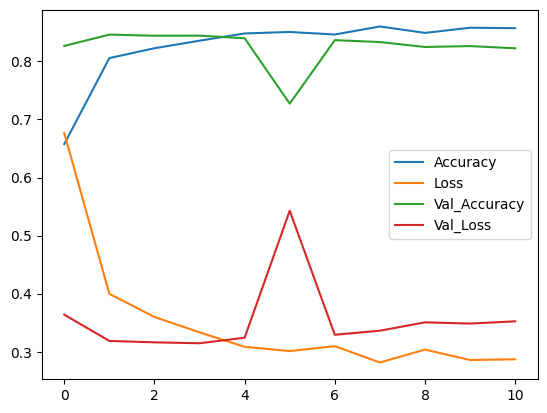

 
The Training Loss is 0.2090, And Training Accuracy is 0.8962
 
The Testing Loss is 0.3524, And Testing Accuracy is 0.8227


In [52]:
convolutional_neural_network = convolutional_neural_network_1d(vocab_size=vocab_size + 1, embedding_dim=embedding_dim, max_length=max_length, dropout=0.7, kernel=3, filters=32, strides=2, padding='valid', embeddings_matrix = embedding_matrix, units_ = 64)
model_compile(model=convolutional_neural_network)
history = model_fit(model=convolutional_neural_network, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=convolutional_neural_network, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=convolutional_neural_network, x=encoded_X_test, y=y_test, train_test='Testing')

**8-LSTM**

Epoch 1/15
1428/1428 [==============================] - 229s 157ms/step - loss: 0.4071 - accuracy: 0.7999 - val_loss: 0.3620 - val_accuracy: 0.8195
Epoch 2/15
1428/1428 [==============================] - 247s 173ms/step - loss: 0.3161 - accuracy: 0.8431 - val_loss: 0.3363 - val_accuracy: 0.8316
Epoch 3/15
1428/1428 [==============================] - 225s 157ms/step - loss: 0.2856 - accuracy: 0.8567 - val_loss: 0.3267 - val_accuracy: 0.8378
Epoch 4/15
1428/1428 [==============================] - 218s 153ms/step - loss: 0.2668 - accuracy: 0.8664 - val_loss: 0.3208 - val_accuracy: 0.8391
Epoch 5/15
1428/1428 [==============================] - 220s 154ms/step - loss: 0.2487 - accuracy: 0.8757 - val_loss: 0.3042 - val_accuracy: 0.8480
Epoch 6/15
1428/1428 [==============================] - 213s 149ms/step - loss: 0.2362 - accuracy: 0.8817 - val_loss: 0.3113 - val_accuracy: 0.8424
Epoch 7/15
1428/1428 [==============================] - 208s 145ms/step - loss: 0.2243 - accuracy: 0.8881 - val_

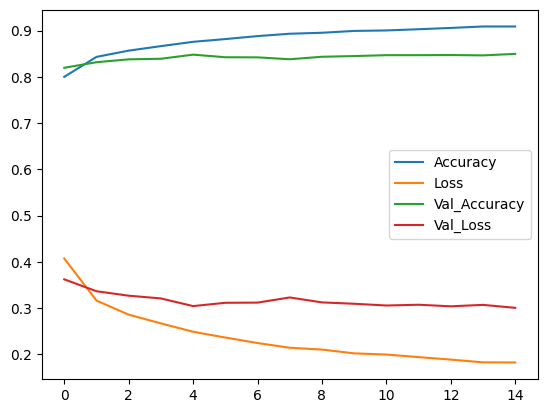

 
The Training Loss is 0.1683, And Training Accuracy is 0.9157
 
The Testing Loss is 0.3004, And Testing Accuracy is 0.8496


In [53]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.1, units=32, embeddings_matrix = embedding_matrix, units_=64)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=LSTM, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=LSTM, x=encoded_X_test,y= y_test, train_test='Testing')

**9-GRU**

Epoch 1/15
1428/1428 [==============================] - 346s 237ms/step - loss: 0.4246 - accuracy: 0.7906 - val_loss: 0.3226 - val_accuracy: 0.8384
Epoch 2/15
1428/1428 [==============================] - 264s 185ms/step - loss: 0.3172 - accuracy: 0.8418 - val_loss: 0.3387 - val_accuracy: 0.8300
Epoch 3/15
1428/1428 [==============================] - 290s 203ms/step - loss: 0.2912 - accuracy: 0.8546 - val_loss: 0.3137 - val_accuracy: 0.8441
Epoch 4/15
1428/1428 [==============================] - 307s 215ms/step - loss: 0.2756 - accuracy: 0.8620 - val_loss: 0.3096 - val_accuracy: 0.8453
Epoch 5/15
1428/1428 [==============================] - 331s 232ms/step - loss: 0.2623 - accuracy: 0.8685 - val_loss: 0.3071 - val_accuracy: 0.8464
Epoch 6/15
1428/1428 [==============================] - 325s 228ms/step - loss: 0.2528 - accuracy: 0.8735 - val_loss: 0.3178 - val_accuracy: 0.8408
Epoch 7/15
1428/1428 [==============================] - 333s 233ms/step - loss: 0.2494 - accuracy: 0.8751 - val_

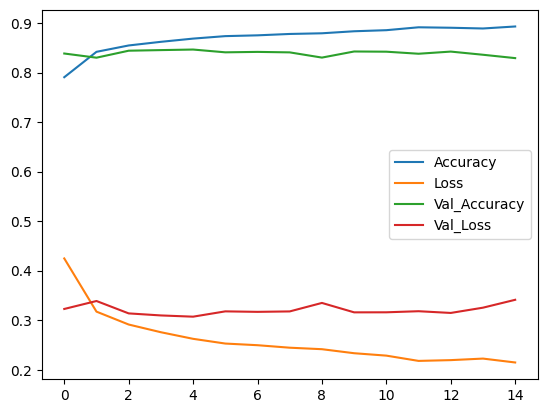

 
The Training Loss is 0.2039, And Training Accuracy is 0.8985
 
The Testing Loss is 0.3411, And Testing Accuracy is 0.8291


In [54]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2, units=32, embeddings_matrix = embedding_matrix, units_ = 64)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=GRU_, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=GRU_, x=encoded_X_test,y= y_test, train_test='Testing')  